# Modelo VAR(p) (Vector Autoregressive)

## Introdução

O modelo **VAR** (Vector Autoregressive) é um modelo estatístico multivariado que descreve a evolução conjunta de um conjunto de variáveis ao longo do tempo. Ele é uma extensão do modelo **AR** (AutoRegressive), onde múltiplas séries temporais inter-relacionadas são modeladas simultaneamente. O VAR é amplamente utilizado em aplicações econômicas, financeiras, climáticas e sociais, pois permite modelar a dinâmica de múltiplas variáveis que podem influenciar-se mutuamente ao longo do tempo.

Diferente do modelo **ARIMA** (AutoRegressive Integrated Moving Average), o modelo VAR **não requer que a série temporal seja univariada** e pode ser aplicado diretamente a um sistema de várias variáveis dependentes. Além disso, enquanto o ARIMA exige que a série seja estacionária (ou seja, com média e variância constantes ao longo do tempo), o VAR pode ser aplicado tanto em séries estacionárias quanto não estacionárias (após a diferenciação adequada, se necessário).

### Definição Formal

O modelo VAR de ordem $ p $, denotado por **VAR(p)**, pode ser representado da seguinte forma:

$$
\mathbf{y}_t = \mathbf{A}_1 \mathbf{y}_{t-1} + \mathbf{A}_2 \mathbf{y}_{t-2} + \ldots + \mathbf{A}_p \mathbf{y}_{t-p} + \mathbf{u}_t
$$

onde:
- $ \mathbf{y}_t $ é um vetor de tamanho $ k $ que representa as $ k $ variáveis endógenas no tempo $ t $.
- $ \mathbf{A}_1, \mathbf{A}_2, \ldots, \mathbf{A}_p $ são matrizes de coeficientes de dimensão $ k \times k $, representando as relações lineares entre as variáveis em diferentes defasagens.
- $ \mathbf{u}_t $ é um vetor de erros (resíduos) de tamanho $ k $, que é normalmente distribuído com média zero e matriz de covariância $ \Sigma_u $, ou seja, $ \mathbf{u}_t \sim N(0, \Sigma_u) $.
- $ p $ é a ordem do modelo, ou seja, o número de defasagens consideradas.

### Exemplo com Duas Variáveis

Para um exemplo mais concreto, considere o caso de duas variáveis $ y_{1,t} $ e $ y_{2,t} $ modeladas por um VAR(1) (primeira ordem, $ p = 1 $). O sistema de equações seria:

$$
\begin{pmatrix}
y_{1,t} \\
y_{2,t}
\end{pmatrix}
=
\begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix}
\begin{pmatrix}
y_{1,t-1} \\
y_{2,t-1}
\end{pmatrix}
+
\begin{pmatrix}
u_{1,t} \\
u_{2,t}
\end{pmatrix}
$$

Na notação explicita a equação acima se torna

$$
\begin{aligned}
y_{1,t} &= a_{11} y_{1,t-1} + a_{12} y_{2,t-1} + u_{1,t} \\
y_{2,t} &= a_{21} y_{1,t-1} + a_{22} y_{2,t-1} + u_{2,t}
\end{aligned}
$$

Nesse exemplo:
- $ a_{11} $ e $ a_{22} $ capturam a relação **autoregressiva** das variáveis com suas próprias defasagens.
- $ a_{12} $ e $ a_{21} $ capturam a influência cruzada entre as variáveis defasadas. Isso significa que o valor de $ y_{2,t-1} $ pode influenciar $ y_{1,t} $, e vice-versa.

### Matriz de Coeficientes

De maneira geral, para um VAR com $ k $ variáveis e ordem $ p $, as relações entre as variáveis podem ser representadas em termos matriciais. Para um VAR(1), temos:

$$
\mathbf{y}_t = \mathbf{A}_1 \mathbf{y}_{t-1} + \mathbf{u}_t
$$

onde:
- $ \mathbf{y}_t = \begin{bmatrix} y_{1,t} \\ y_{2,t} \\ \vdots \\ y_{k,t} \end{bmatrix} $
- $ \mathbf{A}_1 = \begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1k} \\ a_{21} & a_{22} & \cdots & a_{2k} \\ \vdots & \vdots & \ddots & \vdots \\ a_{k1} & a_{k2} & \cdots & a_{kk} \end{bmatrix} $
- $ \mathbf{u}_t = \begin{bmatrix} u_{1,t} \\ u_{2,t} \\ \vdots \\ u_{k,t} \end{bmatrix} $

Cada linha da matriz $ \mathbf{A}_1 $ contém os coeficientes que descrevem como cada variável defasada afeta a variável atual.

### Estacionariedade e Propriedades

Embora o modelo VAR possa ser aplicado a séries não estacionárias, a análise das propriedades das séries é importante. Um VAR será estacionário se os autovalores das matrizes de coeficientes estiverem **dentro do círculo unitário**. Em termos práticos, isso significa que as influências das variáveis defasadas sobre si mesmas e sobre outras variáveis não podem ser explosivas, ou seja, não podem crescer indefinidamente com o tempo.

Se a série não for estacionária, pode ser necessário realizar transformações, como a **diferenciação** das variáveis (removendo tendências de longo prazo), para que o modelo VAR seja adequado.

### Teste de Causalidade de Granger
Para que usar um modelo de VAR faça sentido, é importante que exista **algum grau de causalidade ou interação entre as variáveis**. Para investigar a causalidade entre duas variáveis $ y_1 $ e $ y_2 $, pode-se utilizar o **teste de causalidade de Granger**, que verifica se os valores passados de $ y_1 $ ajudam a prever $ y_2 $ (e vice-versa). Se houver causalidade, um modelo VAR pode ser apropriado para capturar essa interação. O teste de causalidade de Granger basicamente compara a qualidade da previsão de $ y_2 $ usando apenas seus próprios valores passados com a qualidade da previsão de $ y_2 $ usando os valores passados de $ y_1 $ também. Se a inclusão de $ y_1 $ melhora significativamente a previsão de $ y_2 $, então $ y_1 $ é considerada causal para $ y_2 $. Senão, não há causalidade entre as variáveis e um modelo VAR pode não ser apropriado.

### Erros e Covariância

Os resíduos $ \mathbf{u}_t $ representam o componente de erro do modelo VAR. Esses erros são normalmente distribuídos com uma matriz de covariância $ \Sigma_u $, o que significa que existe a possibilidade de **correlação entre os erros** das diferentes variáveis. Essa matriz de covariância pode revelar informações importantes sobre como os choques em uma variável podem se propagar para outras variáveis do sistema.

### Estimativa dos Parâmetros

A estimativa dos coeficientes $ \mathbf{A}_1, \mathbf{A}_2, \ldots, \mathbf{A}_p $ no modelo VAR é feita tipicamente por métodos de **Mínimos Quadrados Ordinários (OLS)**, uma vez que o modelo VAR pode ser visto como um sistema de equações lineares multivariadas. Como cada equação no VAR é linear e pode ser estimada separadamente, a solução OLS é computacionalmente eficiente e amplamente utilizada.

Para um VAR(1), por exemplo, cada equação da forma:

$$
y_{i,t} = a_{i1} y_{1,t-1} + a_{i2} y_{2,t-1} + \ldots + a_{ik} y_{k,t-1} + u_{i,t}
$$

é estimada individualmente para cada $i$, utilizando os dados das variáveis defasadas.

### Algumas Aplicações do Modelo VAR na Econofísica

O modelo VAR é amplamente utilizado para estudar a interação dinâmica entre variáveis. Algumas aplicações incluem:
- **Macroeconomia**: Análise de políticas monetárias e fiscais, onde variáveis como taxa de juros, inflação e PIB são modeladas juntas para investigar como uma variável influencia as outras.
- **Finanças**: Análise de retornos de ativos financeiros, taxas de câmbio, e preços de commodities, 

## Implementação em Python

O objetivo é prever o preço de boi gordo e preço de bezerras no Canada. Estes dois preços são altamente correlacionados e podem ser modelados por um VAR.

In [5]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.varmax import VARMAX
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
plt.rcParams["figure.figsize"] = (9,6)

Source: Statistics Canada. Table 32-10-0077-01  [Farm product prices, crops and livestock](https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=3210007701)

In [7]:
df = pd.read_csv('../data/barley_cow_calves_price.csv')
df.head()

,Date,barley,cows,calves
0,Jan-92,66.98,47.79,96.25
1,Feb-92,69.53,51.65,90.11
2,Mar-92,68.97,53.49,101.50
3,Apr-92,69.42,54.24,99.91
4,May-92,71.41,55.18,111.25


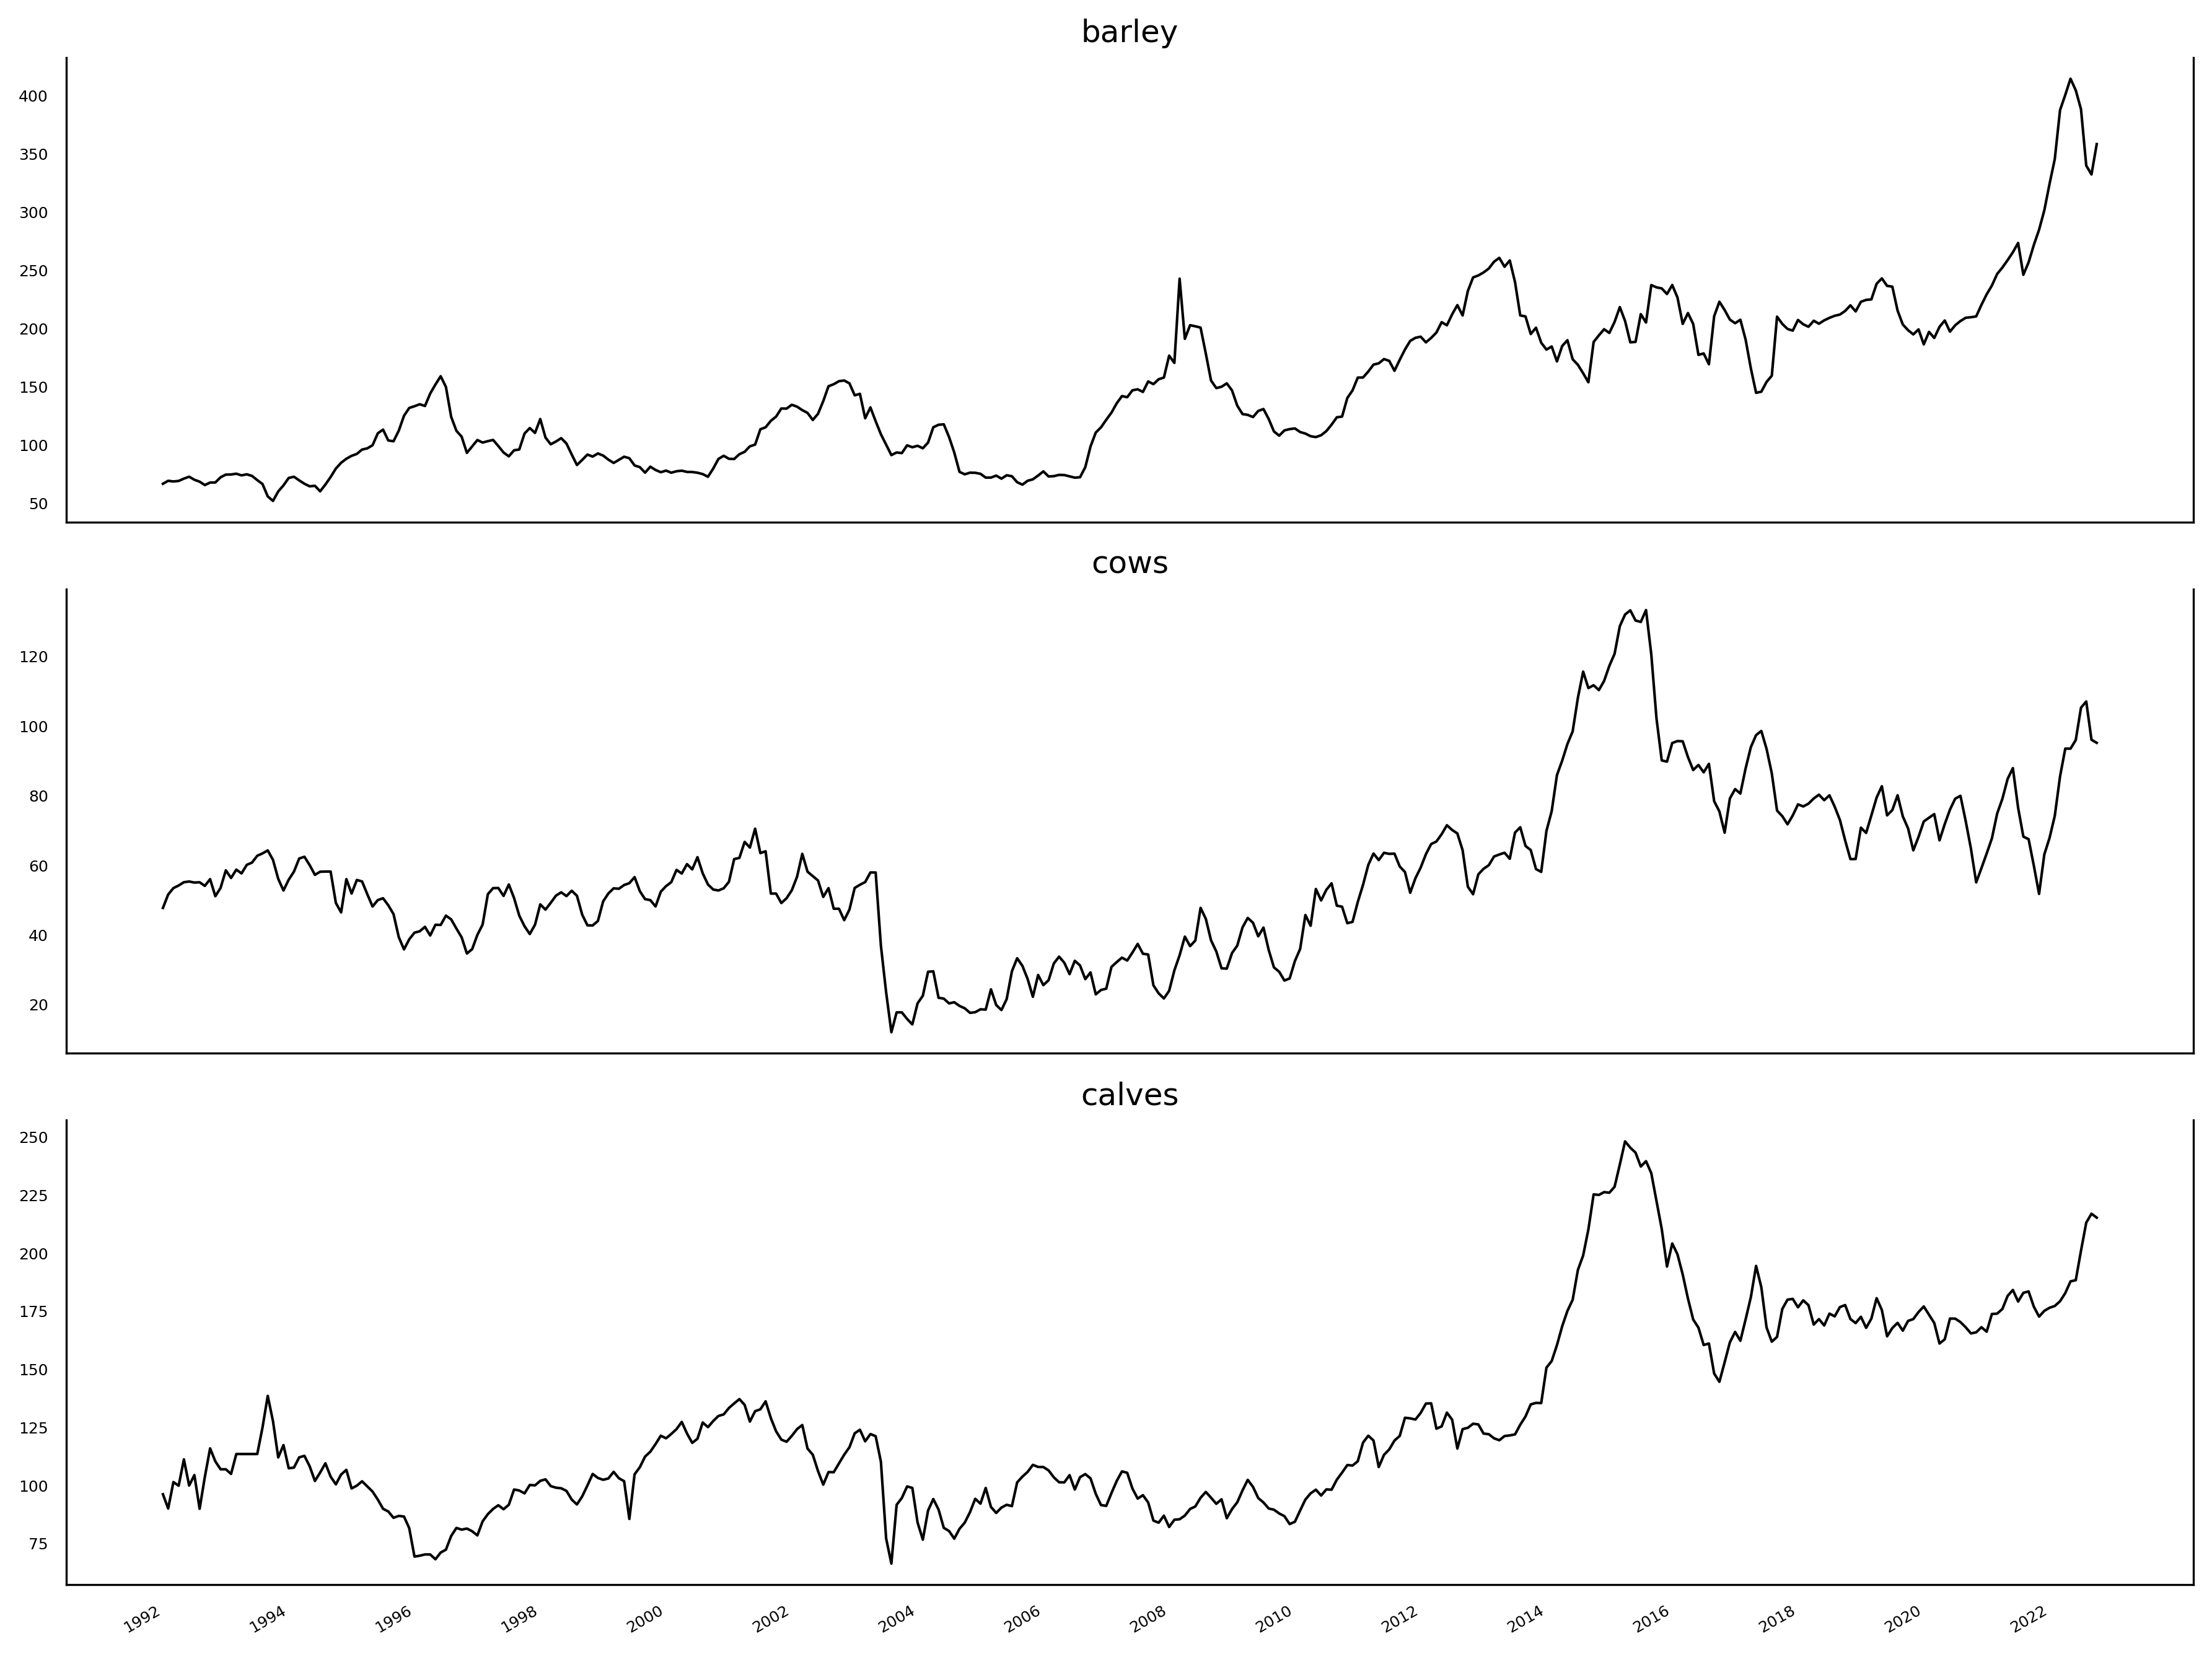

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=300, figsize=(12,9))

for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i+1]]
    
    ax.plot(data, color='black', linewidth=1)
    ax.set_title(df.columns[i+1])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.setp(axes, xticks=np.arange(0, 369, 24), xticklabels=np.arange(1992, 2023, 2))

fig.autofmt_xdate()

plt.tight_layout()

### Check for stationarity 

In [9]:
ad_fuller_result_1 = adfuller(df['cows'])

print('cows')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df['calves'])

print('calves')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

cows
ADF Statistic: -1.8246733271229654
p-value: 0.36828268807258124

---------------------

calves
ADF Statistic: -0.6797085372042222
p-value: 0.8519357094122588


In [10]:
ad_fuller_result_1 = adfuller(df['cows'].diff()[1:])

print('cows')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df['calves'].diff()[1:])

print('calves')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

cows
ADF Statistic: -3.9172400148092907
p-value: 0.001911570559956123

---------------------

calves
ADF Statistic: -5.358388855111437
p-value: 4.139911181465984e-06


### Model selection 

In [11]:
def VAR_gridsearch(endog, min_p, max_p):
    
    all_p = range(min_p, max_p +1, 1)
    
    results = []
    
    print(f'Fitting {all_p} unique models')
    
    for p in tqdm_notebook(all_p):
        try:
            model = VARMAX(endog, order=(p, 0)).fit(dips=False)
        except:
            continue
            
        results.append([p, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['p', 'AIC']
    
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [12]:
endog = df[['cows', 'calves']]

endog_diff = df[['cows', 'calves']].diff()[1:]

train = endog_diff[:-48]
test = endog_diff[-48:]

result_df = VAR_gridsearch(train, 0, 6)
result_df

Fitting range(0, 7) unique models


  0%|          | 0/7 [00:00<?, ?it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01907D+00    |proj g|=  1.28020D-03

At iterate    5    f=  6.01905D+00    |proj g|=  4.23217D-04

At iterate   10    f=  6.01904D+00    |proj g|=  1.04136D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     12     17      1     0     0   1.365D-05   6.019D+00
  F =   6.0190424801630771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.00973D+00    |proj g|=  6.59996D-04

At iterate   10    f=  6.00972D+00    |proj g|=  5.83160D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     11     14      1     0     0   5.038D-05   6.010D+00
  F =   6.0097196850564867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97964D+00    |proj g|=  1.32222D-02

At iterate    5    f=  5.97938D+00    |proj g|=  3.20549D-03


 This problem is unconstrained.



At iterate   10    f=  5.97936D+00    |proj g|=  2.70107D-04

At iterate   15    f=  5.97936D+00    |proj g|=  4.88050D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     19      1     0     0   7.981D-06   5.979D+00
  F =   5.9793634220493024     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95695D+00    |proj g|=  1.54730D-02

At iterate    5    f=  5.95633D+00    |proj g|=  5.35442D-03


 This problem is unconstrained.



At iterate   10    f=  5.95629D+00    |proj g|=  9.08624D-04

At iterate   15    f=  5.95629D+00    |proj g|=  1.44035D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     18     23      1     0     0   1.160D-05   5.956D+00
  F =   5.9562858929421534     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94334D+00    |proj g|=  3.06900D-02


 This problem is unconstrained.



At iterate    5    f=  5.94184D+00    |proj g|=  3.59830D-03

At iterate   10    f=  5.94181D+00    |proj g|=  1.82100D-03

At iterate   15    f=  5.94180D+00    |proj g|=  1.62863D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     18     23      1     0     0   1.215D-05   5.942D+00
  F =   5.9418030890515903     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92062D+00    |proj g|=  3.97520D-02

At iterate    5    f=  5.91816D+00    |proj g|=  4.93724D-03

At iterate   10    f=  5.91809D+00    |proj g|=  1.16741D-03

At iterate   15    f=  5.91807D+00    |proj g|=  1.77037D-04

At iterate   20    f=  5.91807D+00    |proj g|=  2.59138D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   29     21     27      1     0     0   1.686D-05   5.918D+00
  F =   5.9180675205585036     

CONVERG

,p,AIC
0,6,3857.399348
1,5,3864.637583
2,4,3865.935543
3,3,3872.751317
4,1,3882.225272
5,2,3884.240038


In [13]:
print('calves Granger-causes cows?\n')
print('------------------')
granger_1 = grangercausalitytests(df[['cows', 'calves']], [6])

print('\ncows Granger-causes calves?\n')
print('------------------')
granger_2 = grangercausalitytests(df[['calves', 'cows']], [6])

calves Granger-causes cows?

------------------

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=3.8994  , p=0.0009  , df_denom=351, df_num=6
ssr based chi2 test:   chi2=24.2630 , p=0.0005  , df=6
likelihood ratio test: chi2=23.4886 , p=0.0006  , df=6
parameter F test:         F=3.8994  , p=0.0009  , df_denom=351, df_num=6

cows Granger-causes calves?

------------------

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.3075  , p=0.0337  , df_denom=351, df_num=6
ssr based chi2 test:   chi2=14.3577 , p=0.0259  , df=6
likelihood ratio test: chi2=14.0818 , p=0.0287  , df=6
parameter F test:         F=2.3075  , p=0.0337  , df_denom=351, df_num=6


In [14]:
VAR_model = VARMAX(train, order=(6,0))
VAR_model_fit = VAR_model.fit(disp=False)

print(VAR_model_fit.summary())

                           Statespace Model Results                           
Dep. Variable:     ['cows', 'calves']   No. Observations:                  321
Model:                         VAR(6)   Log Likelihood               -1899.700
                          + intercept   AIC                           3857.399
Date:                Tue, 01 Oct 2024   BIC                           3966.771
Time:                        15:44:32   HQIC                          3901.069
Sample:                             0                                         
                                - 321                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.16, 0.05   Jarque-Bera (JB):        116.37, 48.74
Prob(Q):                        0.69, 0.81   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         2.22, 0.93   Skew:                     -0.49, -0.18
Prob(H) (two-sided):            0.00,

### Residuals analysis
#### Boi Gordo

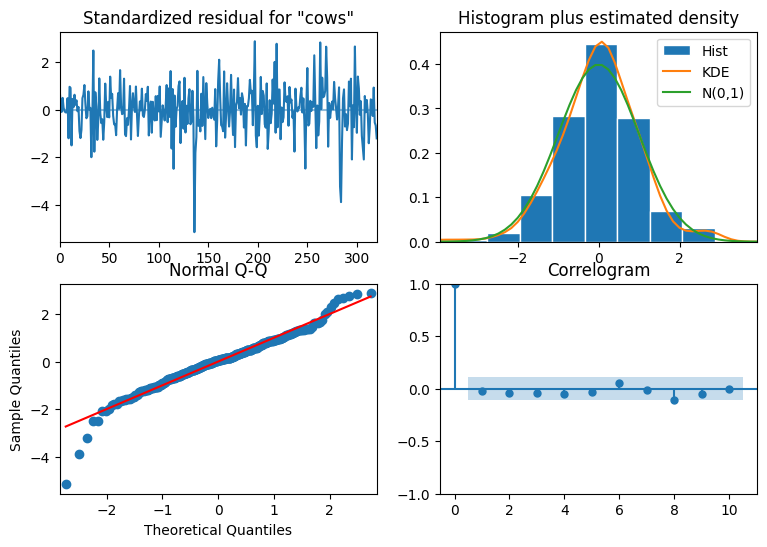

In [15]:
# cows
VAR_model_fit.plot_diagnostics(variable=0);

In [16]:
def ljung_box_test(residuals, is_seasonal, period):
    
    if is_seasonal:
        lb_df = acorr_ljungbox(residuals, period=period)
    else:
        max_lag = min([10, len(residuals)/5])
        
        lb_df = acorr_ljungbox(residuals, np.arange(1, max_lag+1, 1))

    fig, ax = plt.subplots()
    ax.plot(lb_df['lb_pvalue'], 'b-', label='p-values')
    ax.hlines(y=0.05, xmin=1, xmax=len(lb_df), color='black')
    plt.tight_layout()
    
    if all(pvalue > 0.05 for pvalue in lb_df['lb_pvalue']):
        print('All values are above 0.05. We fail to reject the null hypothesis. The residuals are uncorrelated')
    else:
        print('At least one p-value is smaller than 0.05')

All values are above 0.05. We fail to reject the null hypothesis. The residuals are uncorrelated


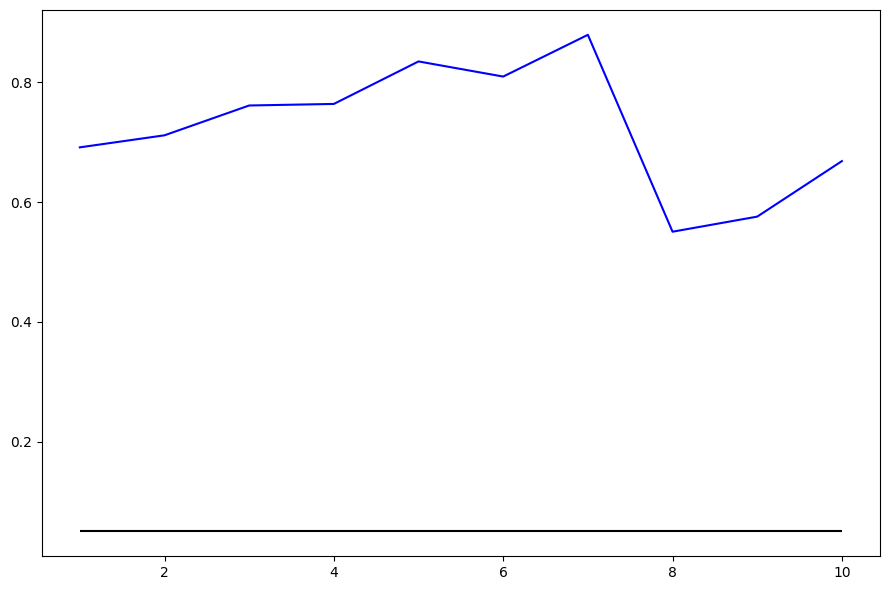

In [17]:
residuals = VAR_model_fit.resid['cows']

ljung_box_test(residuals, False, None)

#### Bezzeros 

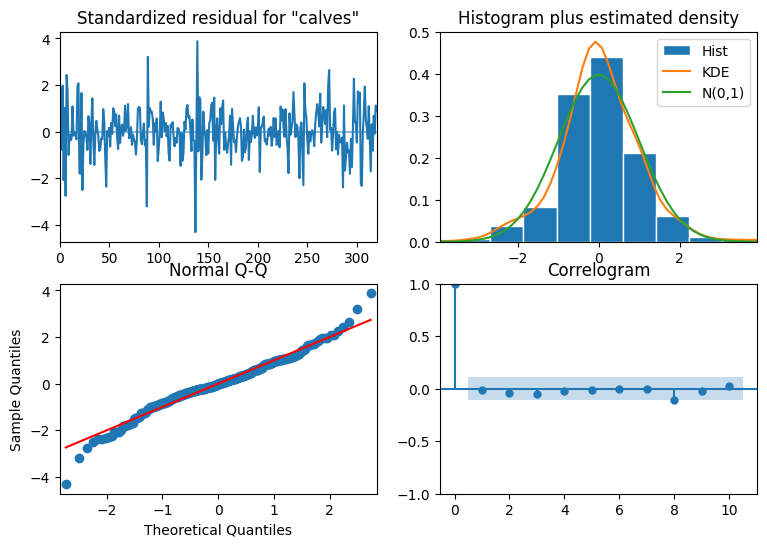

In [18]:
# calves
VAR_model_fit.plot_diagnostics(variable=1);

All values are above 0.05. We fail to reject the null hypothesis. The residuals are uncorrelated


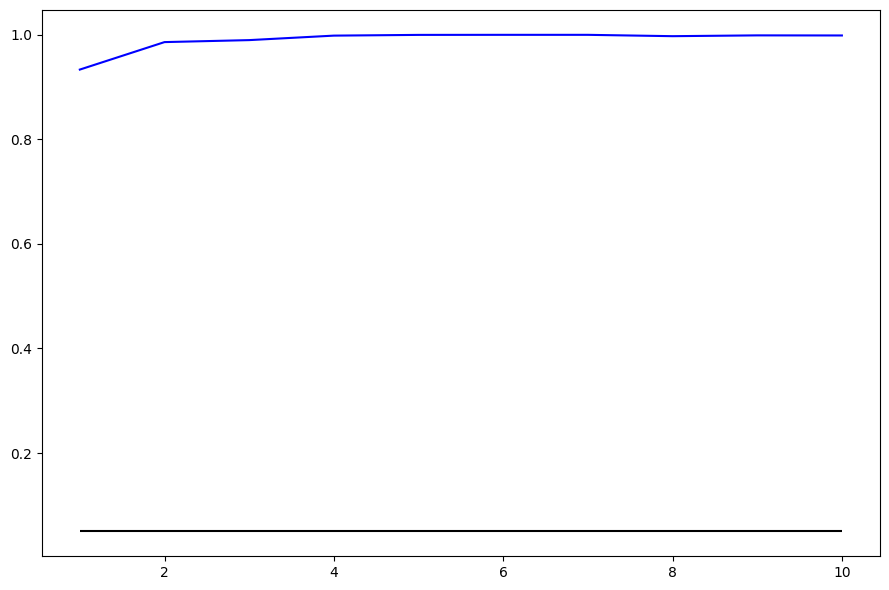

In [19]:
residuals = VAR_model_fit.resid['calves']

ljung_box_test(residuals, False, None)

### Forecasting

In [20]:
def rolling_predictions(df, last_train_value, train_len, horizon, window, method):
    
    total_len = train_len + horizon
    
    if method == 'VAR':

        cows_pred_VAR = []
        calves_pred_VAR = []
        
        for i in range(train_len, total_len, window):
            model = VARMAX(df[:i], order=(6,0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            
            oos_pred_cows = predictions.predicted_mean.iloc[-window:]['cows']
            oos_pred_calves = predictions.predicted_mean.iloc[-window:]['calves']
            
            cows_pred_VAR.extend(oos_pred_cows)
            calves_pred_VAR.extend(oos_pred_calves)
            
        cows_pred_VAR = np.insert(cows_pred_VAR, 0, last_train_value['cows'])
        cows_pred_VAR = cows_pred_VAR.cumsum()
        
        calves_pred_VAR = np.insert(calves_pred_VAR, 0, last_train_value['calves'])
        calves_pred_VAR = calves_pred_VAR.cumsum()
        
        return cows_pred_VAR[:horizon], calves_pred_VAR[:horizon]
    
    elif method == 'last':
        cows_pred_last = []
        calves_pred_last = []
        
        for i in range(train_len, total_len, window):
            
            cows_last = df[:i].iloc[-1]['cows']
            calves_last = df[:i].iloc[-1]['calves']
            
            cows_pred_last.extend(cows_last for _ in range(window))
            calves_pred_last.extend(calves_last for _ in range(window))
        
        cows_pred_last = np.insert(cows_pred_last, 0, last_train_value['cows'])
        cows_pred_last = cows_pred_last.cumsum()
        
        calves_pred_last = np.insert(calves_pred_last, 0, last_train_value['calves'])
        calves_pred_last = calves_pred_last.cumsum()
            
        return cows_pred_last[:horizon], calves_pred_last[:horizon]

In [21]:
pred_df = df[['cows', 'calves']][-48:]

TRAIN_LEN = len(train)
HORIZON = len(test)
LAST_TRAIN_VALUE = endog.iloc[321]

windows = [1, 4, 6, 12]

for window in windows:
    cows_pred_last, calves_pred_last = rolling_predictions(endog_diff, LAST_TRAIN_VALUE, TRAIN_LEN, HORIZON, window, 'last')
    cows_pred_VAR, calves_pred_VAR = rolling_predictions(endog_diff, LAST_TRAIN_VALUE, TRAIN_LEN, HORIZON, window, 'VAR')
    
    pred_df[f'cows_pred_last_{window}'] = cows_pred_last
    pred_df[f'calves_pred_last_{window}'] = calves_pred_last
    pred_df[f'cows_pred_VAR_{window}'] = cows_pred_VAR
    pred_df[f'calves_pred_VAR_{window}'] = calves_pred_VAR
    
pred_df.head()

,cows,calves,cows_pred_last_1,calves_pred_last_1,cows_pred_VAR_1,calves_pred_VAR_1,cows_pred_last_4,calves_pred_last_4,cows_pred_VAR_4,calves_pred_VAR_4,cows_pred_last_6,calves_pred_last_6,cows_pred_VAR_6,calves_pred_VAR_6,cows_pred_last_12,calves_pred_last_12,cows_pred_VAR_12,calves_pred_VAR_12
322,61.81,171.68,67.17,177.70,67.170000,177.700000,67.17,177.70,67.170000,177.700000,67.17,177.70,67.170000,177.700000,67.17,177.70,67.170000,177.700000
323,61.85,169.94,61.30,178.56,66.948169,176.391738,61.30,178.56,66.948169,176.391738,61.30,178.56,66.948169,176.391738,61.30,178.56,66.948169,176.391738
324,70.84,172.67,55.94,172.54,67.358382,174.392420,55.43,179.42,68.581829,176.128407,55.43,179.42,68.581829,176.128407,55.43,179.42,68.581829,176.128407
325,69.34,167.90,55.98,170.80,69.223348,175.614713,49.56,180.28,71.353641,178.178357,49.56,180.28,71.353641,178.178357,49.56,180.28,71.353641,178.178357
326,74.36,171.88,64.97,173.53,73.689360,179.524382,43.69,181.14,74.045799,179.656663,43.69,181.14,74.045799,179.656663,43.69,181.14,74.045799,179.656663


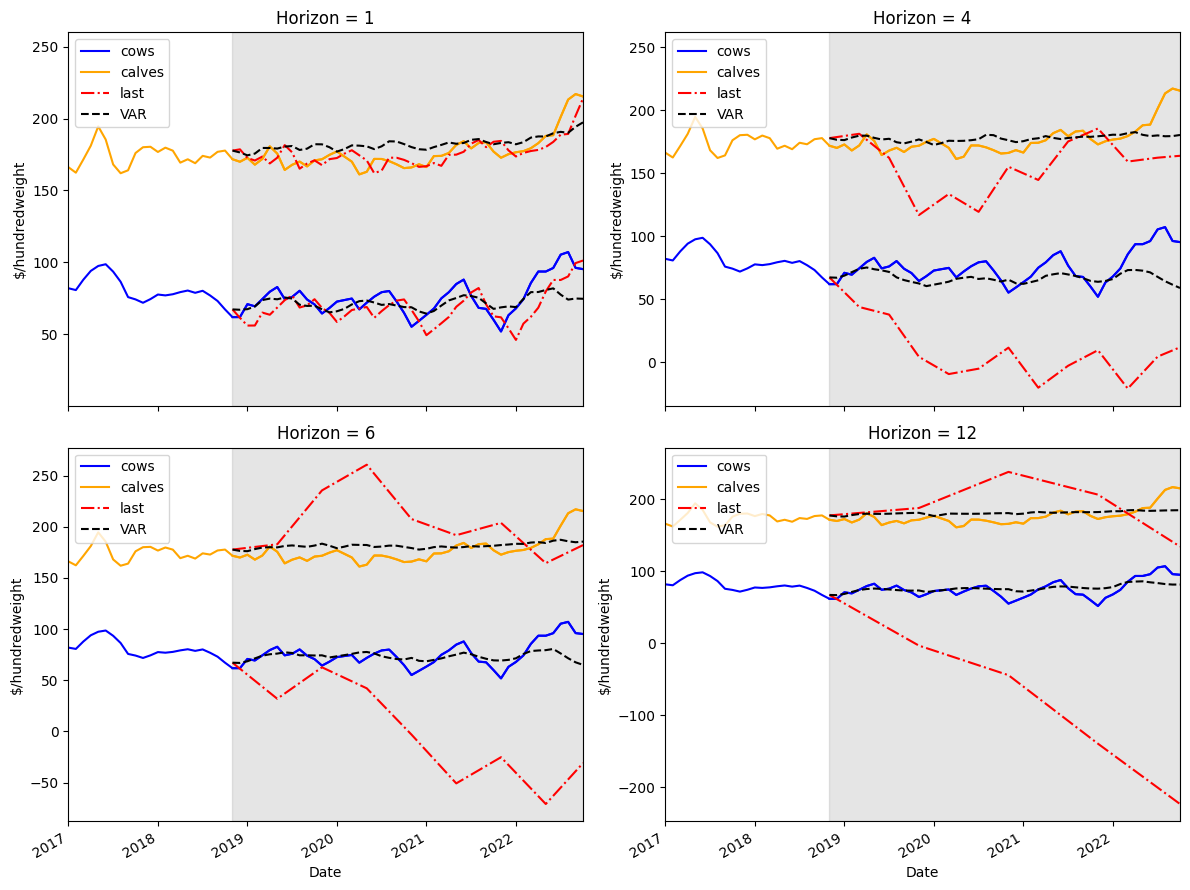

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

for i, ax in enumerate(axes.flatten()):
    
    ax.plot(df['cows'], color='blue')
    ax.plot(df['calves'], color='orange')
    ax.plot(pred_df['cows'], color='blue', label='cows')
    ax.plot(pred_df['calves'], color='orange', label='calves')
    ax.plot(pred_df[f'cows_pred_last_{windows[i]}'], 'r-.', label='last')
    ax.plot(pred_df[f'calves_pred_last_{windows[i]}'], 'r-.')
    ax.plot(pred_df[f'cows_pred_VAR_{windows[i]}'], 'k--', label='VAR')
    ax.plot(pred_df[f'calves_pred_VAR_{windows[i]}'], 'k--')
    ax.legend(loc=2)
    ax.set_xlabel('Date')
    ax.set_ylabel('$/hundredweight')
    ax.axvspan(322, 369, color='#808080', alpha=0.2)
    ax.set_xlim(300, 369)
    ax.set_title(f'Horizon = {windows[i]}')
    
plt.setp(axes, xticks=np.arange(300, 369, 12), xticklabels=np.arange(2017, 2023, 1))

fig.autofmt_xdate()
plt.tight_layout()

### Evaluation 

In [23]:
from sklearn.metrics import mean_absolute_error

mae_cow_last_1 = mean_absolute_error(pred_df['cows'], pred_df['cows_pred_last_1'])
mae_calves_last_1 = mean_absolute_error(pred_df['calves'], pred_df['calves_pred_last_1'])
mae_cow_VAR_1 = mean_absolute_error(pred_df['cows'], pred_df['cows_pred_VAR_1'])
mae_calves_VAR_1 = mean_absolute_error(pred_df['calves'], pred_df['calves_pred_VAR_1'])

mae_cow_last_4 = mean_absolute_error(pred_df['cows'], pred_df['cows_pred_last_4'])
mae_calves_last_4 = mean_absolute_error(pred_df['calves'], pred_df['calves_pred_last_4'])
mae_cow_VAR_4 = mean_absolute_error(pred_df['cows'], pred_df['cows_pred_VAR_4'])
mae_calves_VAR_4 = mean_absolute_error(pred_df['calves'], pred_df['calves_pred_VAR_4'])

mae_cow_last_6 = mean_absolute_error(pred_df['cows'], pred_df['cows_pred_last_6'])
mae_calves_last_6 = mean_absolute_error(pred_df['calves'], pred_df['calves_pred_last_6'])
mae_cow_VAR_6 = mean_absolute_error(pred_df['cows'], pred_df['cows_pred_VAR_6'])
mae_calves_VAR_6 = mean_absolute_error(pred_df['calves'], pred_df['calves_pred_VAR_6'])

mae_cow_last_12 = mean_absolute_error(pred_df['cows'], pred_df['cows_pred_last_12'])
mae_calves_last_12 = mean_absolute_error(pred_df['calves'], pred_df['calves_pred_last_12'])
mae_cow_VAR_12 = mean_absolute_error(pred_df['cows'], pred_df['cows_pred_VAR_12'])
mae_calves_VAR_12 = mean_absolute_error(pred_df['calves'], pred_df['calves_pred_VAR_12'])

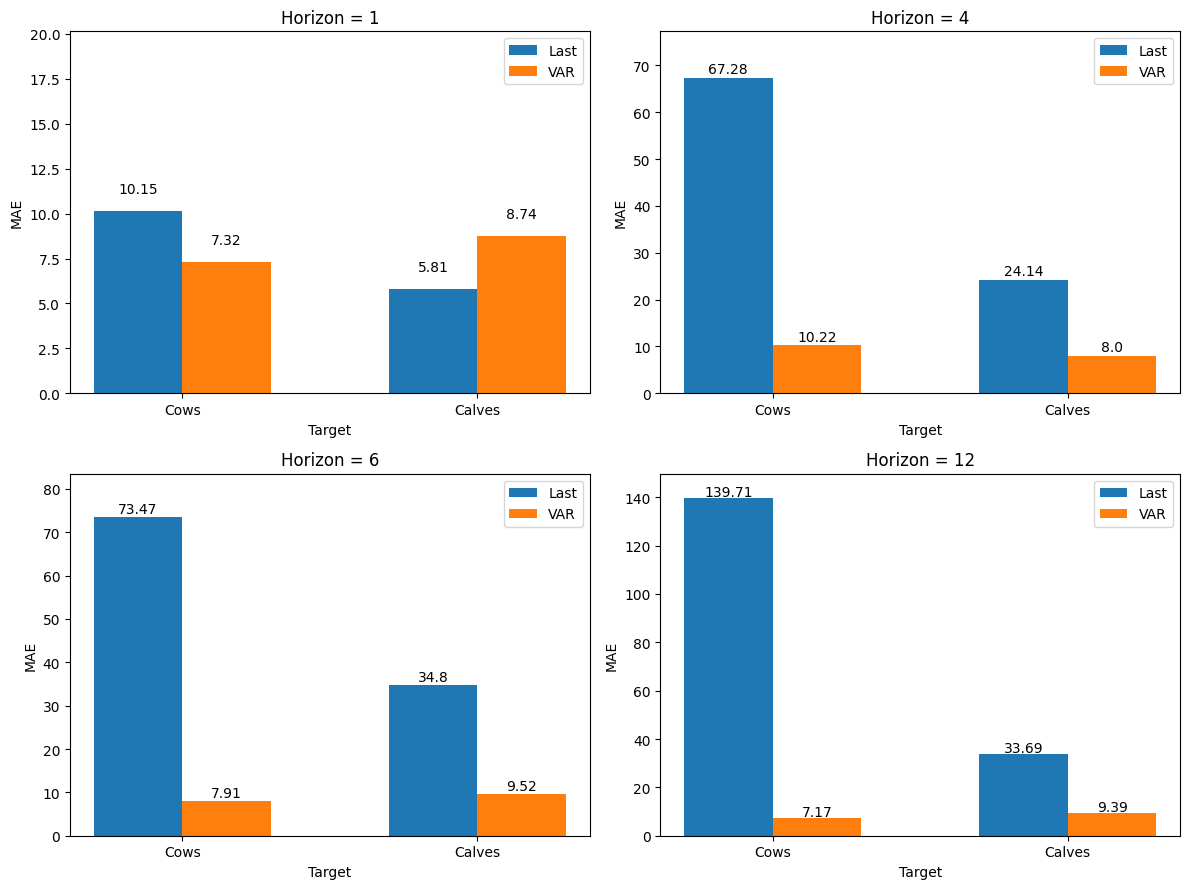

In [24]:
mae_cows_last = [mae_cow_last_1, mae_cow_last_4, mae_cow_last_6, mae_cow_last_12]
mae_calves_last = [mae_calves_last_1, mae_calves_last_4, mae_calves_last_6, mae_calves_last_12]
mae_cows_VAR = [mae_cow_VAR_1, mae_cow_VAR_4, mae_cow_VAR_6, mae_cow_VAR_12]
mae_calves_VAR = [mae_calves_VAR_1, mae_calves_VAR_4, mae_calves_VAR_6, mae_calves_VAR_12]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

width = 0.3
labels = ['Cows', 'Calves']
x = np.arange(len(labels))

for i, ax in enumerate(axes.flatten()):
    y_last = [mae_cows_last[i], mae_calves_last[i]]
    y_VAR = [mae_cows_VAR[i], mae_calves_VAR[i]]
    
    ax.bar(x - width/2, y_last, width, label='Last')
    ax.bar(x + width/2, y_VAR, width, label='VAR')
    
    ax.set_ylim(0, max(y_last) + 10)
    ax.set_ylabel('MAE')
    ax.set_xlabel('Target')
    ax.set_title(f'Horizon = {windows[i]}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='best')
    
    for i, v in enumerate(y_last):
        ax.text(x=i - width/2, y=v+1, s=str(round(v, 2)), ha='center')
    for i, v in enumerate(y_VAR):
        ax.text(x=i + width/2, y=v+1, s=str(round(v, 2)), ha='center')
    
plt.tight_layout()